#Finding Magnitude Spectrum with FFT

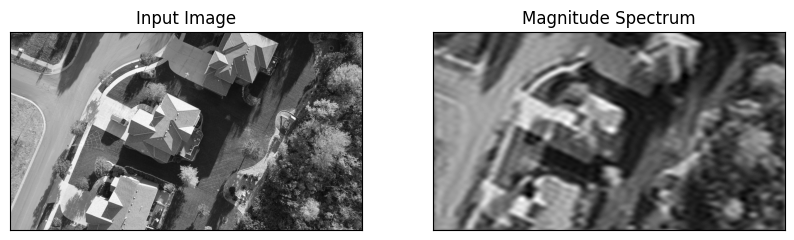

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# read the input image
# you can specify the path to image
image_path = r"/content/aerial.jpg"
image = cv2.imread(image_path, 0)

# calculating the discrete Fourier transform
DFT = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

# reposition the zero-frequency component to the spectrum's middle
shift = np.fft.fftshift(DFT)
row, col = image.shape
center_row, center_col = row // 2, col // 2

# create a mask with a centered square of 1s
mask = np.zeros((row, col, 2), np.uint8)
mask[center_row - 30:center_row + 30, center_col - 30:center_col + 30] = 1

# put the mask and inverse DFT in place.
fft_shift = shift * mask
fft_ifft_shift = np.fft.ifftshift(fft_shift)
imageThen = cv2.idft(fft_ifft_shift)

# calculate the magnitude of the inverse DFT
imageThen = cv2.magnitude(imageThen[:,:,0], imageThen[:,:,1])

# visualize the original image and the magnitude spectrum
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imageThen, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


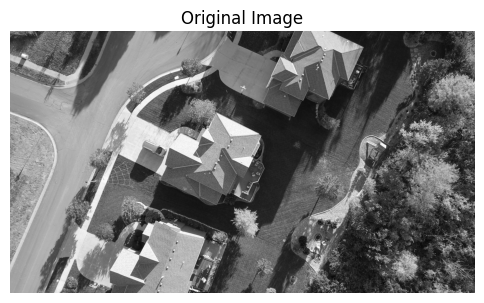

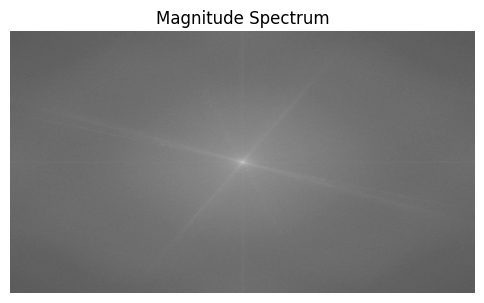

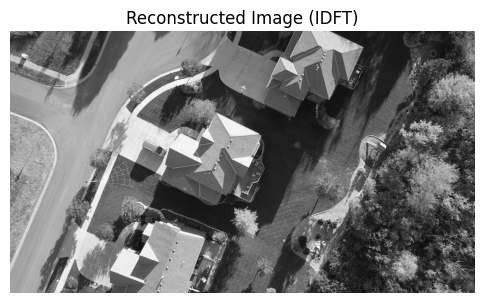

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
path = '/content/aerial.jpg'
img = cv2.imread(path, 0)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')  # Hide axis
plt.show()

# Compute the 2D FFT
f = np.fft.fft2(img)
fs = np.fft.fftshift(f)  # Shift the zero frequency component to the center

# Compute magnitude spectrum and apply log scaling for better visibility
lfs = 15 * np.log(1 + np.abs(fs))

# Display the magnitude spectrum
plt.figure(figsize=(6, 6))
plt.imshow(lfs, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')  # Hide axis
plt.show()

# Inverse FFT to get back to the spatial domain
ishift_img = np.fft.ifftshift(fs)  # Inverse shift
ifft_img = np.fft.ifft2(ishift_img)  # Inverse FFT
abs_img = np.abs(ifft_img)  # Get the absolute value to discard imaginary part

# Display the result of inverse FFT
plt.figure(figsize=(6, 6))
plt.imshow(abs_img, cmap='gray')
plt.title("Reconstructed Image (IDFT)")
plt.axis('off')  # Hide axis
plt.show()
